In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
xgboost = pd.read_csv("./metrics/073_xgboost.csv.zip")
decision_tree = pd.read_csv("./metrics/073_decision_tree.csv.zip")
random_forest = pd.read_csv("./metrics/073_random_forest.csv.zip")
mlp = pd.read_csv("./metrics/073_mlpr.csv.zip")

In [3]:
metrics = pd.concat([xgboost,decision_tree,random_forest,mlp])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.932051,17.850832,646.180240,25.420076,0.067632,0.546315,0.005472
0,Decision Tree,0.911865,22.200765,838.148021,28.950786,0.086562,0.005168,0.000412
0,Random Forest,0.902842,20.780195,923.952792,30.396592,0.083983,1.299001,0.036681
0,MLP,0.252891,68.297290,7104.846700,84.290250,0.239538,6.301413,0.001316


In [6]:
metrics.to_csv("./metrics/074_best_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


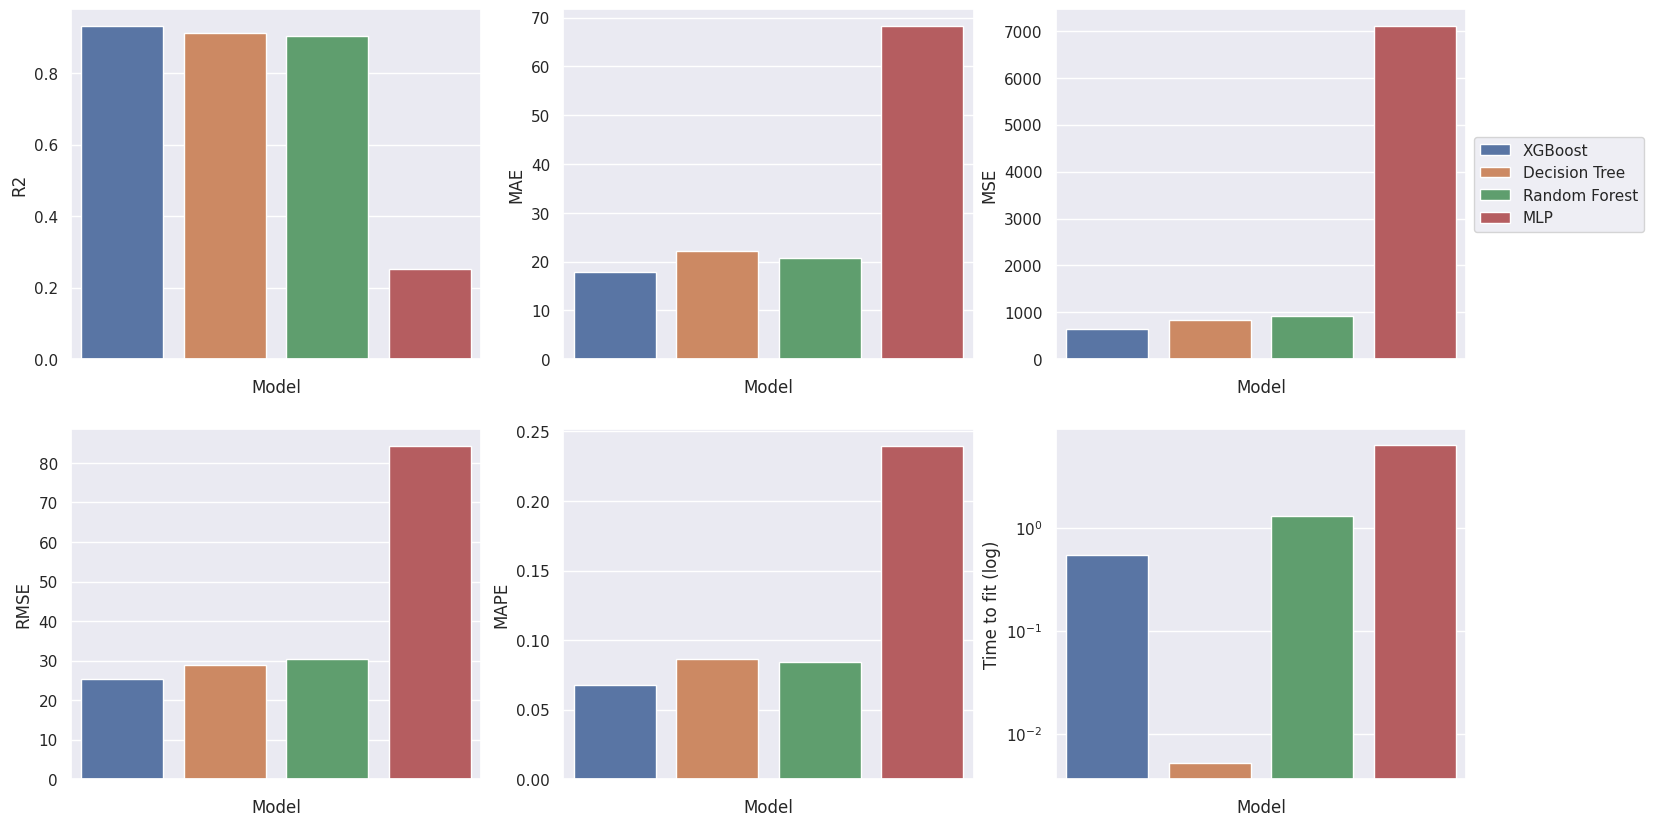

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)",yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/074_yonge_count_weather_best_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/074_yonge_count_weather_best_metrics.png",bbox_inches="tight")